# Análise dos dados de viagem dos táxis amarelos de New York

## Em que período do ano os táxis são mais utilizados?

In [3]:
import pandas as pd
import calendar

# Retorna um dataframe com a quantidade de viagens de taxi por mês de 2020
def amount_trips_month():
    trip_month = []

    # Especificação dos tipos das colunas para diminuir o consumo de memória da função read_csv()
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                'total_amount': float, 'congestion_surcharge': float}
    
       
    # Ingere o csv referente a cada mês da iteração em um dataframe e extrai a quantidade de corridas
    for i in range(1, 13):
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        trip_month.append([int(str(i).zfill(2)), month['tpep_pickup_datetime'].count()]) 
        
        # Remove o dataframe do mês a fim de liberar espaço na memória
        del month
    
    # Dataframe para armazenar as viagens por mês a partir da lista trip_month
    amount_trips = pd.DataFrame(trip_month, columns = ['month', 'number_trips'])
    amount_trips['month'] = amount_trips['month'].apply(lambda x: calendar.month_name[x])
    
    return amount_trips

amount_trips_month()

,month,number_trips
0,January,6405008
1,February,6299354
2,March,3007292
3,April,237993
4,May,348371
5,June,549760
6,July,800412
7,August,1007284
8,September,1341012
9,October,1681131


### Os taxis foram mais utilizados no mês de Janeiro de 2020, com um número de 6405008 viagens.

## Demonstre através de gráficos os bairros que possuem maior uso de táxis por mês.

- Utiliza o bairro do ponto de partida da viagem de taxi para a análise do número de viagens.
- A coluna PULocationID não possui valores nulos.

In [4]:
import pandas as pd
import calendar
import seaborn as sns

# Retorna um dataframe com os 3 bairros com mais corridas para cada mês de 2020
def top_trips_per_borough():
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                    'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                    'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                    'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                    'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                    'total_amount': float, 'congestion_surcharge': float}
    
    top_3_months = []
    lookup = pd.read_csv('data/taxi_zone_lookup.csv')
      
    for i in range(1,13): 
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        month = month[['tpep_pickup_datetime', 'PULocationID']]
        lookup = lookup[['LocationID', 'Borough']]
        
        # Mapeamento do número da localidade ao seu bairro correspondente
        borough_trips = pd.merge(month, lookup, left_on = 'PULocationID', right_on = 'LocationID', how = 'left')
        del month
        
        # Contagem dos 3 bairros com mais viagens no mês
        top_trips = borough_trips['Borough'].value_counts(sort = True, ascending = True).nlargest(3).to_dict()
        del borough_trips
        
        for key in top_trips:
            top_3_months.append({'month': i, 'borough': key, 'count_trips': top_trips[key]})
        
        del top_trips
        
    # Dataframe com os 3 bairros com mais corridas para cada mês
    trips = pd.DataFrame(top_3_months)
    trips['month'] = trips['month'].apply(lambda x: calendar.month_name[x])
               
    return trips

top_3_trips_borough = top_trips_per_borough()
top_3_trips_borough

,month,borough,count_trips
0,January,Manhattan,5846105
1,January,Queens,425439
2,January,Brooklyn,71164
3,February,Manhattan,5797819
4,February,Queens,377988
5,February,Brooklyn,67973
6,March,Manhattan,2754457
7,March,Queens,182145
8,March,Brooklyn,39846
9,April,Manhattan,212996


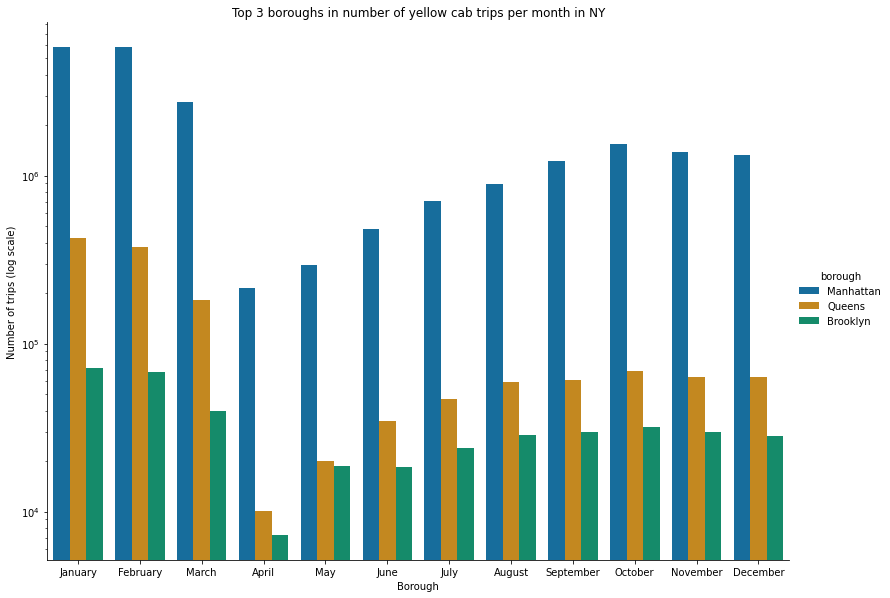

In [5]:
# Gera um gráfico de barras referente ao maior uso de táxis nos bairros de New York por mês
# Gráfico em escala logarítmica para facilitar a visualização
ax = sns.catplot(x = "month", y = "count_trips", hue = "borough", kind = "bar", \
                 data = top_3_trips_borough, log = True, height = 8, \
                 aspect = 11/8, palette = 'colorblind')

ax.set(xlabel = 'Borough', ylabel = 'Number of trips (log scale)', \
       title = 'Top 3 boroughs in number of yellow cab trips per month in NY')

del top_3_trips_borough

### Os bairros com mais viagens por mês em New York, em ordem,  são:
 - Manhattan 
 - Queens 
 - Brooklyn

## Em quais janelas de tempo as viagens contém mais passageiros?

Utilize as janelas abaixo:
 - 0h às 5h (4:59)
 - 5h às 11h
 - 11h às 14h
 - 14h às 17h
 - 17h às 21h
 - 21h às 24h

In [6]:
import pandas as pd
import datetime as dt


# Retorna a condição para filtrar o dataframe por janela de tempo
def get_window_mask(start, end, df):
    return (df['tpep_pickup_datetime'].dt.hour >= start) & (df['tpep_dropoff_datetime'].dt.hour < end)\
           & (df['tpep_pickup_datetime'].dt.hour < end)


# Retorna um dataframe com a quantidade de passageiros nos taxis em cada janela de tempo
def passenger_time_window():
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                        'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                        'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                        'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                        'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                        'total_amount': float, 'congestion_surcharge': float}
    
    passengers_per_windows = pd.DataFrame(columns = ['passenger_count', 'window'])
    
    for i in range(1, 13):
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        month = month[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count']]
        
        # Conversão dos tipos das colunas relevantes
        month['passenger_count'] = month['passenger_count'].astype('Int64')
        month['tpep_pickup_datetime'] = pd.to_datetime(month['tpep_pickup_datetime'])
        month['tpep_dropoff_datetime'] = pd.to_datetime(month['tpep_pickup_datetime'])
        
        # Remoção das viagens para as quais não existe quantidade de passageiros
        month = month.dropna(subset = ['passenger_count'])  
        
        # Itera no mês a partir das janelas
        for start, end in [(0, 5), (5, 11), (11, 14), (14, 17), (17, 21), (21,24)]:
            mask = get_window_mask(start, end, month)
            month['window'] = str(start) + 'h - ' + str(end) + 'h'
            month_window = month[mask]            
            
            frames = [passengers_per_windows, month_window]
            passengers_per_windows = pd.concat(frames)
            del month_window
        del month


    passengers_per_windows = passengers_per_windows.reset_index()
    passengers_per_windows.drop(columns = ['index', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'],\
                           inplace = True)
    # Cálculo do número de passageiros por janela de tempo
    passengers_per_windows = passengers_per_windows.groupby(['window']).sum()
    passengers_per_windows.sort_values(['passenger_count'], ascending = False, inplace = True)
    
    return passengers_per_windows

passenger_time_window()

,passenger_count
window,
17h - 21h,8737307
5h - 11h,7068636
14h - 17h,6662982
11h - 14h,5922367
21h - 24h,4395166
0h - 5h,2208766


### As janelas de tempo com mais passageiros em NY no ano de 2020, em ordem, são:

- 17h às 21h
- 5h às 11h
- 14h às 17h

## Demonstre através de gráficos os bairros que possuem maior número de passageiros por janela de tempo.

Utilize as janelas abaixo:
 - 0h às 5h (4:59)
 - 5h às 11h
 - 11h às 14h
 - 14h às 17h
 - 17h às 21h
 - 21h às 24h

In [7]:
import pandas as pd
import datetime as dt
import seaborn as sns

# Retorna a condição para filtrar o dataframe por janela de tempo
def get_window_mask(start, end, df):
    return (df['tpep_pickup_datetime'].dt.hour >= start) & (df['tpep_pickup_datetime'].dt.hour < end)\
           & (df['tpep_pickup_datetime'].dt.hour < end)

# Retorna a quantidade de passageiros para cada bairro no intervalo de tempo [start, end[
def passenger_borough_window(start, end): 
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                        'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                        'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                        'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                        'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                        'total_amount': float, 'congestion_surcharge': float}
    
    borough_window = pd.DataFrame(columns = ['passenger_count','Borough', 'window'])
    lookup = pd.read_csv('data/taxi_zone_lookup.csv')
        
    for i in range(1, 13):
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)

        # Conversão de tipos dos dados
        month['tpep_pickup_datetime'] = pd.to_datetime(month['tpep_pickup_datetime'])
        month['tpep_dropoff_datetime'] = pd.to_datetime(month['tpep_dropoff_datetime'])
        month['passenger_count'] = month['passenger_count'].astype('Int64')
        month = month[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', \
                                       'PULocationID']]
        
        month_borough = pd.merge(month, lookup, left_on = 'PULocationID', right_on = 'LocationID', \
                                 how = 'left')
        # Remove as viagens para as quais não existe quantidade de passageiros
        month_borough = month_borough.dropna(subset = ['passenger_count'])
        
        mask = get_window_mask(start, end, month_borough)
        month_borough = month_borough[mask]
        month_borough['window'] = str(start) + '-' + str(end)
        month_borough.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', \
                                      'LocationID', 'Zone', 'service_zone'], inplace = True)
        
        frames = [borough_window, month_borough]
        borough_window = pd.concat(frames)
    
    # Calculo da quantidade dos passageiros por janela de tempo
    borough_window = borough_window.groupby('Borough').sum()
    borough_window.sort_values('passenger_count', ascending = False, inplace = True)

    return borough_window


## Janela de tempo de 0h às 5h 

In [8]:
window_0_5 = passenger_borough_window(0, 5)
window_0_5

,passenger_count
Borough,
Manhattan,2025228
Queens,113280
Brooklyn,43061
Unknown,18896
Bronx,7815
Staten Island,336
EWR,150


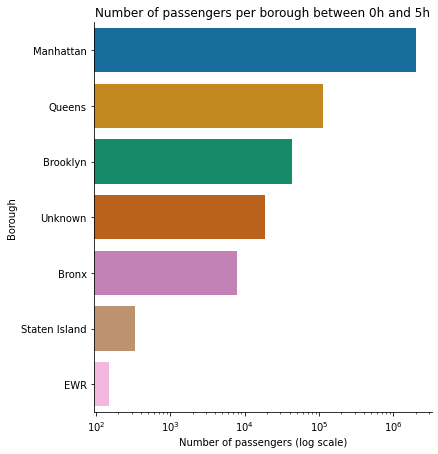

In [9]:
ax = sns.catplot(y = window_0_5.index, x = 'passenger_count', kind = 'bar', data = window_0_5, \
                 palette = 'colorblind', height = 6, log = True)

ax.set(ylabel = 'Borough', xlabel = 'Number of passengers (log scale)', \
       title = 'Number of passengers per borough between 0h and 5h')

del window_0_5

## Janela de tempo de 5h às 11h 

In [10]:
window_5_11 = passenger_borough_window(5, 11)
window_5_11

,passenger_count
Borough,
Manhattan,6583385
Queens,350248
Brooklyn,68312
Unknown,49739
Bronx,15680
EWR,782
Staten Island,490


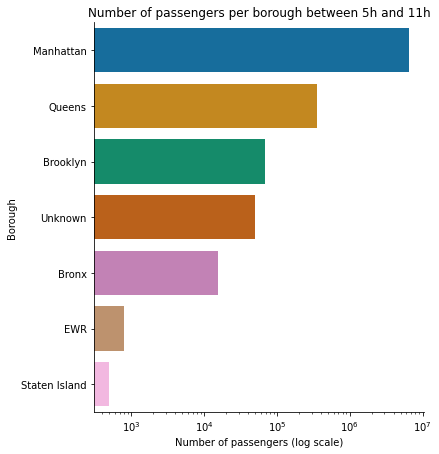

In [11]:
ax = sns.catplot(y = window_5_11.index, x = 'passenger_count', kind = 'bar', data = window_5_11, \
                 palette = 'colorblind', height = 6, log = True)

ax.set(ylabel = 'Borough', xlabel = 'Number of passengers (log scale)', \
       title = 'Number of passengers per borough between 5h and 11h')

del window_5_11

## Janela de tempo de 11h às 14h 

In [12]:
window_11_14 = passenger_borough_window(11, 14)
window_11_14

,passenger_count
Borough,
Manhattan,5560295
Queens,273956
Unknown,41021
Brooklyn,36138
Bronx,10002
EWR,561
Staten Island,394


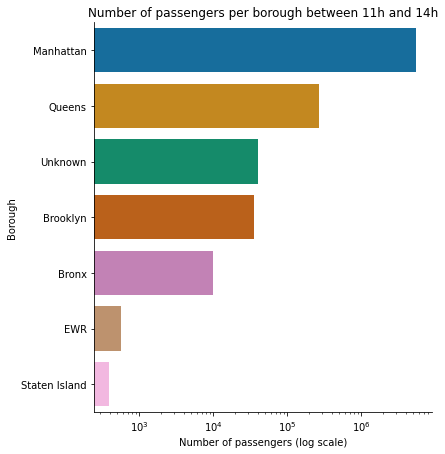

In [13]:
ax = sns.catplot(y = window_11_14.index, x = 'passenger_count', kind = 'bar', data = window_11_14, \
                 palette = 'colorblind', height = 6, log = True)

ax.set(ylabel = 'Borough', xlabel = 'Number of passengers (log scale)', \
       title = 'Number of passengers per borough between 11h and 14h')

del window_11_14

## Janela de tempo de 14h às 17h 

In [14]:
window_14_17 = passenger_borough_window(14, 17)
window_14_17

,passenger_count
Borough,
Manhattan,6176733
Queens,386008
Unknown,47246
Brooklyn,39560
Bronx,12262
EWR,911
Staten Island,262


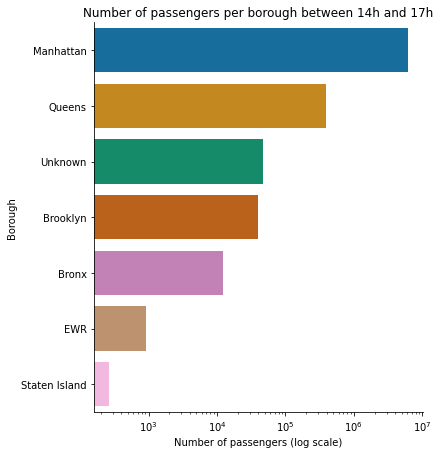

In [15]:
ax = sns.catplot(y = window_14_17.index, x = 'passenger_count', kind = 'bar', data = window_14_17, \
                 palette = 'colorblind', height = 6, log = True)

ax.set(ylabel = 'Borough', xlabel = 'Number of passengers (log scale)', \
       title = 'Number of passengers per borough between 14h and 17h')

del window_14_17

## Janela de tempo de 17h às 21h 

In [16]:
window_17_21 = passenger_borough_window(17, 21)
window_17_21

,passenger_count
Borough,
Manhattan,8120578
Queens,482421
Unknown,60566
Brooklyn,59363
Bronx,13204
EWR,698
Staten Island,477


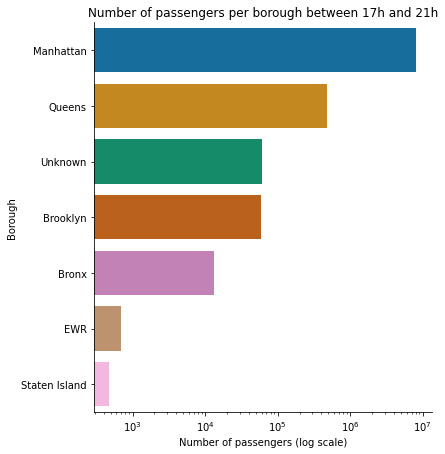

In [17]:
ax = sns.catplot(y = window_17_21.index, x = 'passenger_count', kind = 'bar', data = window_17_21, \
                 palette = 'colorblind', height = 6, log = True)

ax.set(ylabel = 'Borough', xlabel = 'Number of passengers (log scale)', \
       title = 'Number of passengers per borough between 17h and 21h')

del window_17_21

## Janela de tempo de 21h às 24h 

In [18]:
window_21_24 = passenger_borough_window(21, 24)
window_21_24

,passenger_count
Borough,
Manhattan,4014246
Queens,295780
Brooklyn,46072
Unknown,31916
Bronx,6733
Staten Island,326
EWR,93


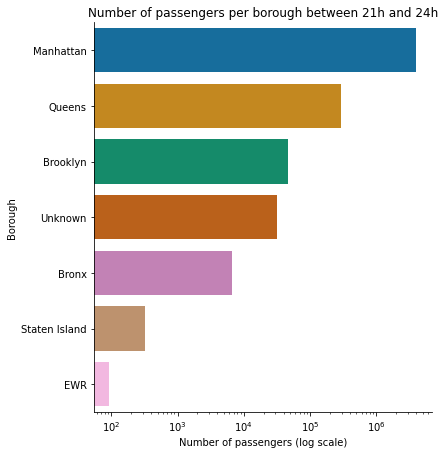

In [19]:
ax = sns.catplot(y = window_21_24.index, x = 'passenger_count', kind = 'bar', data = window_21_24, \
                 palette = 'colorblind', height = 6, log = True)

ax.set(ylabel = 'Borough', xlabel = 'Number of passengers (log scale)', \
       title = 'Number of passengers per borough between 21h and 24h')

del window_21_24

## Como a distância se correlaciona com a duração das viagens? 
Demonstre através de gráficos essa correlação.

In [20]:
import pandas as pd
import datetime as dt
import seaborn as sns


# Retorna um dataframe com colunas referentes ao tempo e a distância das corridas de taxi
def taxis_time_distance():
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                        'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                        'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                        'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                        'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                        'total_amount': float, 'congestion_surcharge': float}
    
    time_dist = pd.DataFrame(columns = ['trip_duration', 'trip_distance', 'trip_average_speed'])
            
    for i in range(1, 13):
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        month = month[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance']]
        
        month['tpep_pickup_datetime'] = pd.to_datetime(month['tpep_pickup_datetime'])
        month['tpep_dropoff_datetime'] = pd.to_datetime(month['tpep_dropoff_datetime'])
        
        # Cria coluna referente a duração da viagem em horas
        month['trip_duration'] = (month['tpep_dropoff_datetime'] - \
                                              month['tpep_pickup_datetime']).dt.total_seconds() / 3600 
        
        month['trip_average_speed'] = month['trip_distance'] / month['trip_duration']
        month.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'], inplace = True)
        
        frames = [time_dist, month]
        time_dist = pd.concat(frames)
        del month
        
    return time_dist

time_dist_taxi = taxis_time_distance()
time_dist_taxi

,trip_duration,trip_distance,trip_average_speed
0,0.080000,1.20,15.000000
1,0.123611,1.20,9.707865
2,0.103056,0.60,5.822102
3,0.080833,0.80,9.896907
4,0.038333,0.00,0.000000
...,...,...,...
1461892,0.279722,9.22,32.961271
1461893,0.148889,4.79,32.171642
1461894,0.655556,28.00,42.711864
1461895,0.214722,7.08,32.972833


[Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Distance'),
 Text(0.5, 1.0, 'Cab trips in NY')]

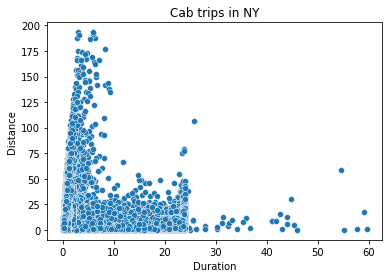

In [21]:
# Plot da distância por tempo das viagens filtrando valores extremos
time_dist_filtered = time_dist_taxi[(time_dist_taxi['trip_duration'] < 60) \
                                    & (time_dist_taxi['trip_duration'] > 0) \
                                    & (time_dist_taxi['trip_distance'] > 0) \
                                    & (time_dist_taxi['trip_distance'] < 200) \
                                    & (time_dist_taxi['trip_average_speed'] < 80)]

ax = sns.scatterplot(data = time_dist_filtered, x = "trip_duration", y = "trip_distance", \
                    palette = 'colorblind')

ax.set(xlabel = 'Duration', ylabel = 'Distance', \
       title = 'Cab trips in NY')

<AxesSubplot:>

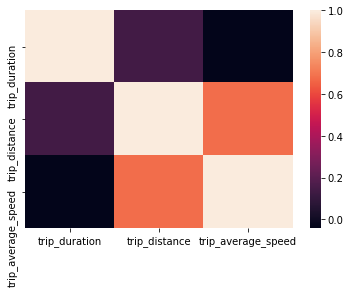

In [22]:
# Heatmap das correlações do dataframe
sns.heatmap(data = time_dist_filtered.corr())

In [23]:
# Correlação entre distância e tempo das viagens filtrando valores extremos
time_dist_filtered['trip_duration'].corr(time_dist_filtered['trip_distance'])

0.14206140507160536

In [24]:
# Remoção do dataframe para desalocar memória
del time_dist_filtered 

[Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Distance'),
 Text(0.5, 1.0, 'Cab trips in NY')]

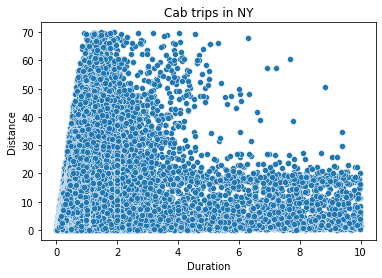

In [25]:
time_dist_filtered_2 = time_dist_taxi[(time_dist_taxi['trip_duration'] < 10) \
                                    & (time_dist_taxi['trip_duration'] > 0) \
                                    & (time_dist_taxi['trip_distance'] > 0) \
                                    & (time_dist_taxi['trip_distance'] < 70) \
                                    & (time_dist_taxi['trip_average_speed'] < 80)]

ax = sns.scatterplot(data = time_dist_filtered_2, x = "trip_duration", y = "trip_distance", \
                    palette = 'colorblind')

ax.set(xlabel = 'Duration', ylabel = 'Distance', \
       title = 'Cab trips in NY')

<AxesSubplot:>

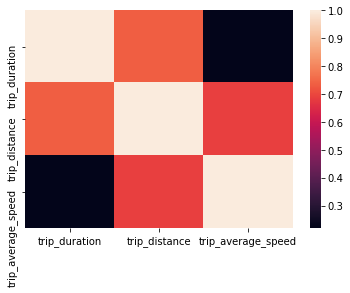

In [26]:
sns.heatmap(data = time_dist_filtered_2.corr())

In [27]:
time_dist_filtered_2['trip_duration'].corr(time_dist_filtered_2['trip_distance'])

0.7372916208828281

In [28]:
del time_dist_filtered_2

[Text(0.5, 17.200000000000003, 'Duration'),
 Text(17.200000000000003, 0.5, 'Distance'),
 Text(0.5, 1.0, 'Cab trips in NY')]

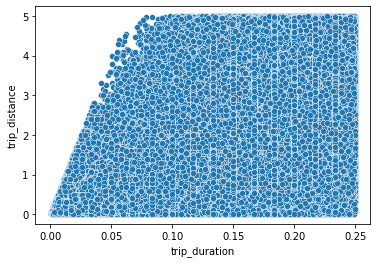

In [29]:
time_dist_filtered_3 = time_dist_taxi[(time_dist_taxi['trip_duration'] < 0.25) \
                                    & (time_dist_taxi['trip_duration'] > 0) \
                                    & (time_dist_taxi['trip_distance'] > 0) \
                                    & (time_dist_taxi['trip_distance'] < 5) \
                                    & (time_dist_taxi['trip_average_speed'] < 80)]

x = sns.scatterplot(data = time_dist_filtered_3, x = "trip_duration", y = "trip_distance", \
                    palette = 'colorblind')

ax.set(xlabel = 'Duration', ylabel = 'Distance', \
       title = 'Cab trips in NY')

<AxesSubplot:>

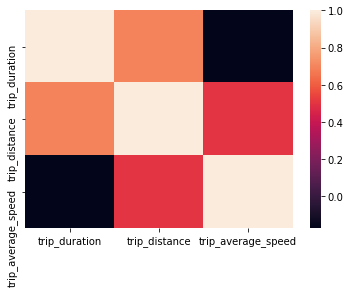

In [30]:
sns.heatmap(data = time_dist_filtered_3.corr())

In [31]:
time_dist_filtered_3['trip_duration'].corr(time_dist_filtered_3['trip_distance'])

0.6958282602132297

Considerações:

- Corridas com distância e tempo em extremos foram descartados da análise.
- A filtragem final dos dados considera que a maior distância entre as fronteiras da cidade NY é 35 milhas.
- A filtragem final dos dados considera que os limites de velocidade na cidade de NY estão abaixo de 40 MPH.
- Corridas com valores razoáveis são aquelas menores que 70 milhas de distância, 10 horas de duração e 80MPH.

Os gráficos exibem algumas evidências:
- Nos gráficos de dispersão referentes ao tempo versus a distância de cada corrida de táxi a correlação não fica óbvia.
- Os gráficos "heatmap" mostram graficamente a correlação entre as colunas referentes à distância e à duração da corrida de táxi.
- Um valor positivo, mais próximo de 1.0 e em torno de 0.70 na correlação de Pearson.

Dessa forma, existem evidências que podem indicar uma correlação positiva entre o tempo das viagens de táxis e a sua distância percorrida. Deixa-se a ressalva de que uma análise mais profunda pode trazer indicadores mais precisos sobre os valores da correlação.

## Descreva como você faria para agendar a execução diaria e/ou mensal destes jobs.

Em um sistema baseado em UNIX é possível utilizar o programa cron para agendar uma execução de um script em um mês/dia/horário específico. Primeiro, é necessário criar um script no formato cron que define o horário de execução e o que executar em tal horário, no caso o notebook.

Como a imagem docker utilizada como base neste projeto, o Notebook Base do Jupyter, é baseada em uma distibuição do Ubuntu então é possivel instalar nela o programa cron a partir do Dockerfile. Também no Dockerfile, tranferir o script anteriormente mencionado para o diretório do cron na imagem e definir a execução do cron como entrypoint em primeiro plano. Assim, o programa cron irá funcionar quando a imagem for executada e irá executar o job no momento determinado.